In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_csv("train.csv",sep=';')
df_test = pd.read_csv("test.csv",sep=';')
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Dataset yang digunakan sebanyak 45211 dimana dataset terdiri atas 16 kolom yang diantaranya terdapat kolom berjenis kategorikal dan numerikal dan 1 kolom berjenis binari
1. Kolom age - usia(numerikal).
2. Kolom job - pekerjaan (kategorikal).
3. Kolom marital - status pernikahan (kategorikal).
4. Kolom education - pendidikan terakhir(kategorikal).
5. Kolom default - status kredit pelanggan (kategorikal).
6. Kolom balance - saldo pelanggan (numerikal).
7. Kolom housing - status pinjaman untuk perumahan (kategorikal).
8. Kolom loan - status pinjaman pribadi (kategorikal).
9. Kolom contact - cara bank menghubungi klien (kategorikal).
10. Kolom day - hari terakhir komunikasi yang dilakukan kepada pelanggan (kategorikal).
11. Kolom month - bulan terakhir komunikasi yang dilakukan kepada pelanggan (kategorikal).
12. Kolom duration - durasi terakhir komunikasi yang dilakukan kepada pelanggan (numerikal).
13. Kolom campaign - jumlah kontak yang dilakukan kepada pelanggan selama masa campaign (numerikal).
14. Kolom pdays - jumlah hari yang berlalu setelah pelanggan dihubungi dari campaign sebelumnya (numerikal).
15. Kolom previous - jumlah panggilan yang dilakukan sebelum campaign sekarang (numerikal).
16. Kolom poutcome - status hasil dari campaign sebelumnya (kategorikal).
17. Kolom y - apakah klien sudah berlangganan deposito berjangka? (binari)

In [5]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1. Pada kolom age menunjukkan sebaran data pelanggan berada pada rentang usia 18 hingga 95 tahun dengan rata-rata pelanggan berumur 40 tahun
2. Terdapat saldo pelanggan yang bernilai negatif (kolom negatif), yang artinya pelanggan tersebut telah menggunakan layanan melebihi saldo yang dimiliki
3. Terdapat pelanggan yang telah dikontak oleh pihak campaign sebanyak 63 kali selama masa campaign
4. Nilai -1 pada kolom p-days menunjukkan bahwa pelanggan tersebut belum pernah dikontak oleh tim campaign pada masa campaign sebelumnya atau dengan kata lain pelanggan tersebut adalah pelanggan baru

In [6]:
df_train.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Mayoritas pelanggan berprofesi blue-collar, kebanyakan pelanggan telah menikah, pendidikan terakhir didominasi oleh mereka yang lulus dari secondary school. Kebanyakan pelanggan juga memilki tanggungan pinjaman rumah. Kemudian, layanan yang paling banyak digunakan oleh pelanggan adalah cellular. Bulan mei merupakan penggunaan layanan tertinggi dalam satu tahun

Label didominasi oleh nilai "no" yang artinya lebih banyak pelanggan yang tidak berlangganan deposito berjangka

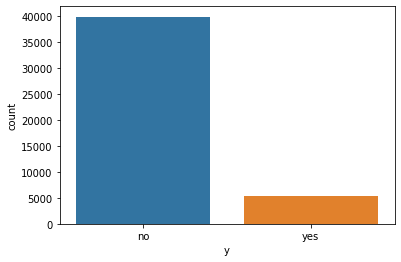

In [7]:
sns.countplot(data=df_train,x = 'y');plt.show()

Cek missing value dan duplicate data

In [8]:
print("Missing : ",df_train.isna().sum().sum())
print("Duplikat : ",df_train.duplicated().sum())

Missing :  0
Duplikat :  0


Cek konsistensi data

Kolom bertipe data objek cenderung memiliki data yang tidak konsisten

In [9]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Kolom bertipe data objek cenderung memiliki data yang tidak konsisten. Umumnya disebabkan oleh kesalahan input

In [10]:
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        print(col," : ",list(df_train[col].unique()))

job  :  ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
marital  :  ['married', 'single', 'divorced']
education  :  ['tertiary', 'secondary', 'unknown', 'primary']
default  :  ['no', 'yes']
housing  :  ['yes', 'no']
loan  :  ['no', 'yes']
contact  :  ['unknown', 'cellular', 'telephone']
month  :  ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
poutcome  :  ['unknown', 'failure', 'other', 'success']
y  :  ['no', 'yes']


Dapat diamati, data yang terekam konsisten. Namun pada beberapa kolom terdapat nilai "unknown" yang kurang mereperesentasikan sesuatu. Nilai "unknown" pada beberapa kolom tersebut akan diatasi pada tahap cleansing data

Cleansing dataset

In [11]:
def convertValue(df):
    # Ubah nilai pada kolom target (y). yes menjadi 1 dan no menjadi nol
    df['y'].replace(to_replace='yes', value=1, inplace=True)
    df['y'].replace(to_replace='no', value=0, inplace=True)

    # Usia dari para nasabah sangat beragam, untuk menyederhanakannya, kami akan mengelompokkan usia nasabah ke dalam empat kelompok, yaitu : 
    # 1. Remaja (11-19 tahun)
    # 2. Dewasa (20-60 tahun)
    # 3. Lansia (61-inf)
    df.loc[((df.age > 10) & (df.age < 20)),  'AgeGroup'] = 'remaja'
    df.loc[((df.age > 19) & (df.age < 61)),  'AgeGroup'] = 'dewasa'
    df.loc[(df.age > 60),  'AgeGroup'] = 'lansia'

    df = df.drop('age', axis=1)

    # Ubah nama bulan ke dalam bentuk numerik
    months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
    df['month'] = df['month'].map(months)

    # Ubah nilai kolom default, housing dan loan ke dalam bentuk numerik
    default = {'yes':1, 'no':0}
    df['default'] = df['default'].map(default)
    df['housing'] = df['housing'].map(default)
    df['loan'] = df['loan'].map(default)

    return df

df_train = convertValue(df_train)

In [12]:
df_test = convertValue(df_test)

Type data dari beberapa kolom adalah object, sehingga perlu diubah kedalam bentuk kategorikal

In [13]:
def convert_to_categorical(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].astype("category")
    return df

df_train = convert_to_categorical(df_train)
df_test = convert_to_categorical(df_test)
df_train.dtypes

job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month           int64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int64
AgeGroup     category
dtype: object

Encode nilai pada setiap kolom kategorikal

In [14]:
# df = pd.get_dummies(df_train); #Konversi kolom bertipe objek menjadi one hot encode untuk mencari korelasi
df = df_train.copy()
for col in df.columns:
    if df_train[col].dtype != 'int64':
        df[f'{col}-encode'] = df[col].cat.codes
df

,job,marital,education,default,balance,housing,loan,contact,day,month,...,previous,poutcome,y,AgeGroup,job-encode,marital-encode,education-encode,contact-encode,poutcome-encode,AgeGroup-encode
0,management,married,tertiary,0,2143,1,0,unknown,5,5,...,0,unknown,0,dewasa,4,1,2,2,3,0
1,technician,single,secondary,0,29,1,0,unknown,5,5,...,0,unknown,0,dewasa,9,2,1,2,3,0
2,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,...,0,unknown,0,dewasa,2,1,1,2,3,0
3,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,...,0,unknown,0,dewasa,1,1,3,2,3,0
4,unknown,single,unknown,0,1,0,0,unknown,5,5,...,0,unknown,0,dewasa,11,2,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,0,825,0,0,cellular,17,11,...,0,unknown,1,dewasa,9,1,2,0,3,0
45207,retired,divorced,primary,0,1729,0,0,cellular,17,11,...,0,unknown,1,lansia,5,0,0,0,3,1
45208,retired,married,secondary,0,5715,0,0,cellular,17,11,...,3,success,1,lansia,5,1,1,0,2,1
45209,blue-collar,married,secondary,0,668,0,0,telephone,17,11,...,0,unknown,0,dewasa,1,1,1,1,3,0


Hasil berikut menunjukkan, nilai "unknown" terdapat pada kolom job, education, contact dan poutcome

In [15]:
unknown_val = {}
for col in df_train.columns:
    unknown_val[col] = df_train[df_train[col] == 'unknown'][col].count()

pd.DataFrame.from_dict(unknown_val,orient='index',columns=["Count"])

,Count
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0
month,0


Data pada kolom job yang bernilai "unknown" tidak bisa langsung kita asumsikan bahwa seseorang tidak memiliki pekerjaan, karena pada kolom job terdapat nilai "unemployed" dan "retired". Kemungkinan nilai unknown muncul karena proses pencatatan data yang kurang baik.

Dapat dilihat pada kolom job, data bernilai "unknown" berjumlah sebanyak 288 atau sebanyak 0.6% dari keseluruhan data

Teknik yang umum digunakan untuk mengatasi masalah tersebut adalah dengan menggunakan nilai modus pada kolom tersebut, namun hal ini dapat berdampak pada meningkatknya jumlah data pada nilai tertentu sehingga menyebabkan bias. Pada dataset ini, profesi terbanyak adalah blue-collar

Cara lainnya adalah dengan mengamati kolom lainnya. Kolom lainnya yang memiliki korelasi tinggi dapat dimanfaatkan untuk mengganti nilai "unknown" pada kolom job.

Umumnya profesi seseorang berkaitan erat dengan latar belakang pendidikannya. Apakah semakin tinggi pendidikan seseorang maka pekerjaan yang dimiliki seseorang juga semakin baik?

In [16]:
print(df_train[df_train['education']=='primary']['job'].value_counts()[:5])
print()
print(df_train[df_train['education']=='secondary']['job'].value_counts()[:5])
print()
print(df_train[df_train['education']=='tertiary']['job'].value_counts()[:5])
print()

blue-collar    3758
retired         795
housemaid       627
services        345
management      294
Name: job, dtype: int64

blue-collar    5371
technician     5229
admin.         4219
services       3457
management     1121
Name: job, dtype: int64

management       7801
technician       1968
self-employed     833
entrepreneur      686
admin.            572
Name: job, dtype: int64



Dapat diamati : 
1. Orang dengan status pendidikan "primary" didominasi oleh "blue-collar".
2. Masih ditemukan profesi yang sama dengan sebelumnya (blue-collar) pada status pendidikan "secondary" namun selisih dengan profesi lainnya tidak terlalu signifikan.
3. Pada status pendidikan "tertiary" didominasi oleh "management"

Berdasarkan hasil di atas, asumsi bahwa semakin tinggi pendidikan seseorang maka pekerjaan yang dimiliki seseorang juga semakin baik bisa diterima

In [17]:
# Cek apakah terdapat pelanggan yang status pekerjaannya "unknown" namun pendidikannya "tertiary"?
df_train[(df_train['job']=="unknown") & (df_train['education']=='tertiary')].head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,AgeGroup
2841,unknown,divorced,tertiary,0,2272,1,0,unknown,14,5,243,1,-1,0,unknown,0,dewasa
4008,unknown,married,tertiary,0,0,0,0,unknown,16,5,409,3,-1,0,unknown,0,dewasa
8965,unknown,married,tertiary,0,0,0,0,unknown,5,6,38,1,-1,0,unknown,0,dewasa
9375,unknown,married,tertiary,0,4150,0,0,unknown,6,6,363,1,-1,0,unknown,0,dewasa
10836,unknown,married,tertiary,0,5837,0,0,unknown,17,6,71,1,-1,0,unknown,0,dewasa


Lalu, bagaimana jika status pendidikannya juga "unknown"?

Kita bisa menggunakan kolom lain yang memiliki korelasi tertinggi lainnya

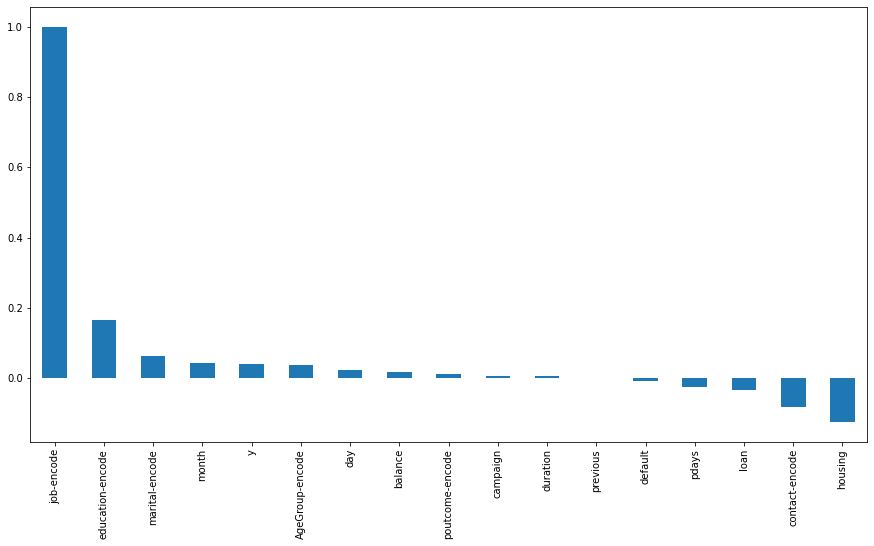

In [18]:
plt.figure(figsize=(15,8))
df.corr()['job-encode'].sort_values(ascending=False).plot(kind='bar') #Kolom job-encode adalah job yang telah diencode agar bisa dicari korelasinya dengan kolom lain

Dari grafik di atas, kolom education dan marital memiliki nilai korelasi yang cukup tinggi terhadap kolom job

Dengan demikian, Kolom berikutnya yang akan digunakan adalah kolom marital/status pernikahan. Kolom tersebut terdiri atas 3 nilai yaitu married, single dan divorce
Sebagai contoh, kita akan mencari profesi dari pelanggan dengan status pendidikan "unknown" dan status pernikahan "married"

In [19]:
df_maritalXeducation = df_train.groupby(['marital','education'])['job'].value_counts()
print(df_maritalXeducation["married"]["unknown"])
print()
print(df_maritalXeducation["divorced"]["unknown"])
print()
print(df_maritalXeducation["single"]["unknown"])
print()

blue-collar      316
management       161
technician       146
admin.           107
retired          101
unknown           95
services          94
entrepreneur      58
housemaid         33
self-employed     23
unemployed        16
student           10
Name: job, dtype: int64

blue-collar      39
management       31
technician       25
services         21
admin.           18
retired          13
unknown           7
entrepreneur      6
housemaid         6
self-employed     1
student           1
unemployed        1
Name: job, dtype: int64

student          152
blue-collar       99
technician        71
management        50
admin.            46
services          35
unknown           25
self-employed     15
entrepreneur      12
unemployed        12
housemaid          6
retired            5
Name: job, dtype: int64



Hasil menunjukkan:
1. Profesi terbanyak dari orang dengan status pendidikan "unknown" dan status pernikahan "married" adalah blue-collar
2. Profesi terbanyak dari orang dengan status pendidikan "unknown" dan status pernikahan "divorce" adalah blue-collar
3. Profesi terbanyak dari orang dengan status pendidikan "unknown" dan status pernikahan "single" adalah student

Ubah seluruh nilai "unknown" pada kolom job dengan ketentuan sbb:
1. Jika education = "primary", maka ubah "unknown" menjadi profesi terbanyak dari pelanggan yang berpendidikan "primary"
2. Jika education = "secondary", maka ubah "unknown" menjadi profesi terbanyak dari pelanggan yang berpendidikan "secondary"
3. Jika education = "tertiary", maka ubah "unknown" menjadi profesi terbanyak dari pelanggan yang berpendidikan "tertiary"

In [20]:
def fillUnknownJob(df, reference_1, reference_2='job'):
    for val in df[reference_1].value_counts().index:
        if val != 'unknown':
            df.loc[(df[reference_1]==val) & (df[reference_2]=='unknown'),'job'] = df[df_train[reference_1]==val]['job'].value_counts().index[0]
    return df

df_train = fillUnknownJob(df_train,'education')
df_test = fillUnknownJob(df_test,'education')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Jika education = "unknown", maka cari profesi terbanyak berdasarkan pengelompokkan kolom marital

In [21]:
df_train = fillUnknownJob(df_train,'marital','education')
df_test = fillUnknownJob(df_test,'marital','education')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Kolom berikutnya yang mengandung nilai "unknown" adalah education.

Sama halnya dengan kasus sebelumnya (kolom job), tingkat pendidikan seseorang dapat dilihat dari profesi yang diambil. Namun pada beberapa kasus, seseorang mungkin saja tidak pernah menempuh pendidikan resmi namun memiliki profesi yang bahkan lebih baik dari mereka yang mengenyam pendidikan. Maka dari itu, pada kolom ini akan ditambahkan kategori baru yaitu "other" untuk merepresentasikan kasus tersebut

In [22]:
df_train['education'].replace(to_replace='unknown', value='other', inplace=True)
df_test['education'].replace(to_replace='unknown', value='other', inplace=True)

Berikutnya adalah kolom contact yang merepresentasikan cara atau media yang digunakan oleh bank untuk menghubungi pelanggan. Pada deskripsi dataset disebutkan bahwa dataset ini berisi data campaign pemasaran jarak jauh melalui panggilan telepon sehingga tidak mungkin tercipta kategori baru selain "cellular" dan "telephone".

Namun, jumlah nilai "unknown" pada kolom contact sangat banyak sehingga sulit untuk mengimputasinya. Dengan demikian, kami akan tetap mempertahankan nilai "unknown" sebagai kategori dan hal ini juga berlaku pada kolom poutcome

EDA

Univariate

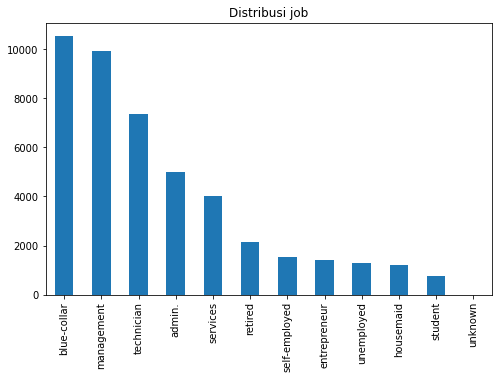

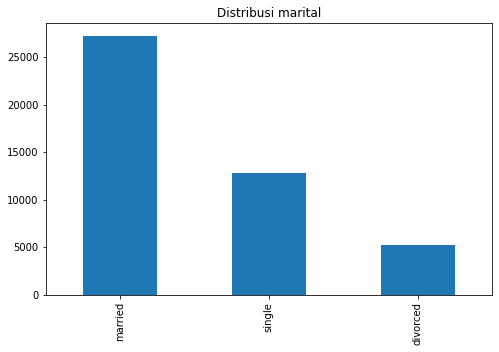

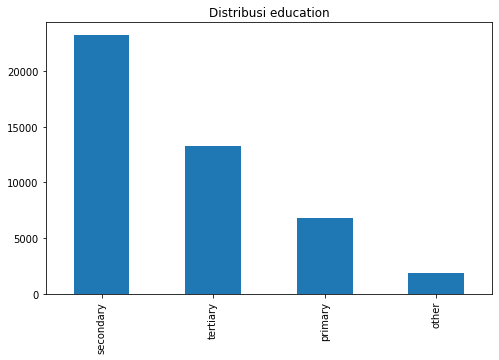

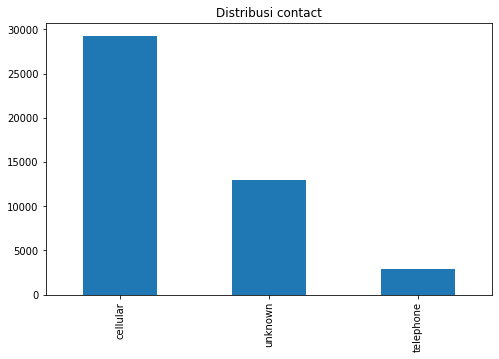

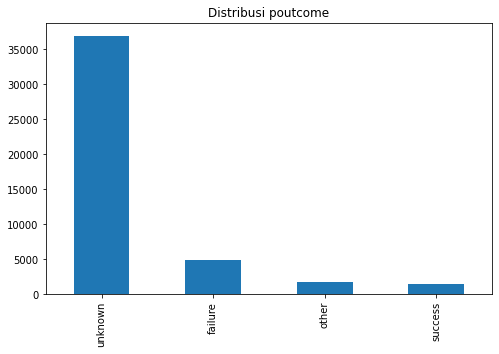

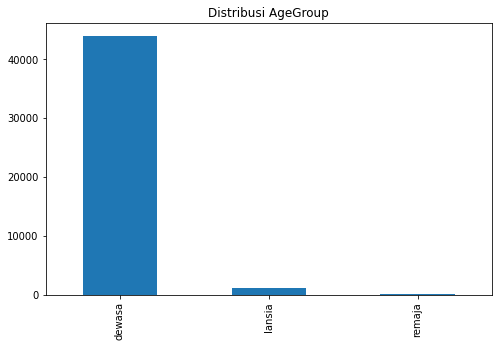

In [23]:
for col in df_train.columns:
    if df_train[col].dtype != 'int64':
        count = df_train[col].value_counts()
        plt.figure(figsize = (8, 5))
        count.plot(kind = "bar")
        plt.title(f"Distribusi {col}")

Garfik di atas menunjukkan : 
1. mayoritas nasabah berprofesi blue-collar lalu diikuti oleh management dan technician
2. Lalu pada status pernikahan, didominasi oleh nasabah yang telah menikah
3. Status pendidikan terbanyak adalah secondary
4. Kebanyakan nasabah tidak memiliki masalah kredit
5. Jumlah nasabah yang memiliki pinjaman perumahan lebih banyak
6. Mayoritas nasabah tidak memiliki pinjaman personal 
7. Cellular merupakan cara yang paling sering digunakan oleh bank untuk menghubungi nasabah
8. Pihak bank sering menghubungi nasabah pada bulan mei
9. Keberhasilan masa campaign sebelumnya tidak bisa diukur dikarenakan kategori "unknown" yang sangat banyak. Namun jik kita membandingkan antara "success" dan "failure" maka akan didapati bahwa masa campaign sebelumnya lebih kerap gagal.
10. Kebanyakan nasabah adalah orang dewasa

Korelasi antar variabel

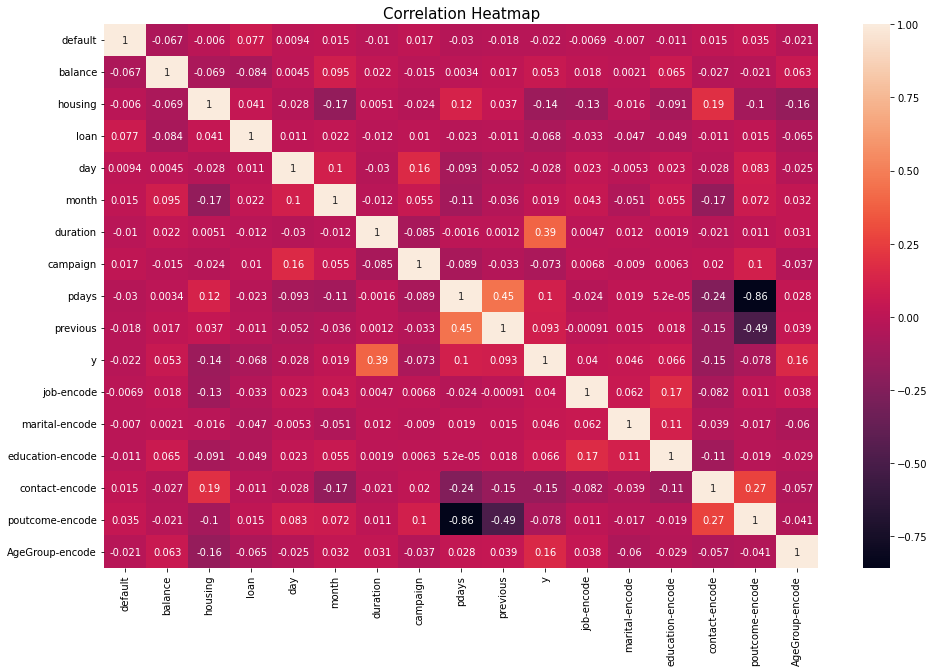

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap",  fontsize = 15)
plt.show()

Dapat dilihat, terdapat beberapa kolom yang saling mempengaruhi, seperti kolom previous & pdays, kolom y & duration, kolom month & contact, kolom poutcome & contact dan kolom month & housing

Multivariate

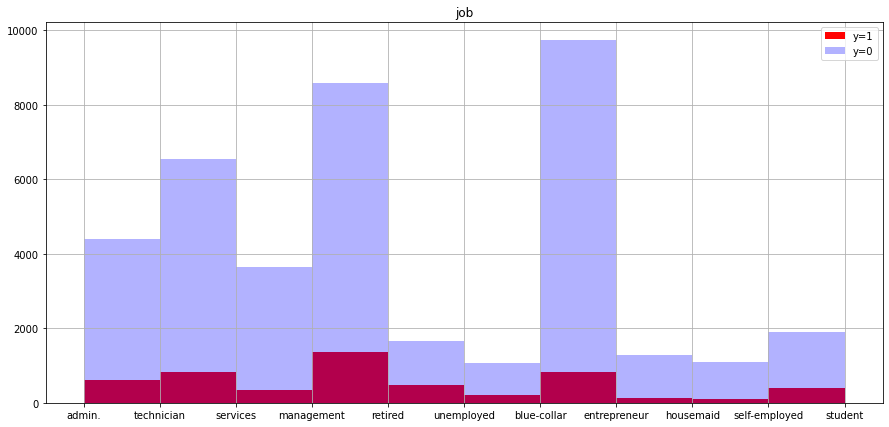

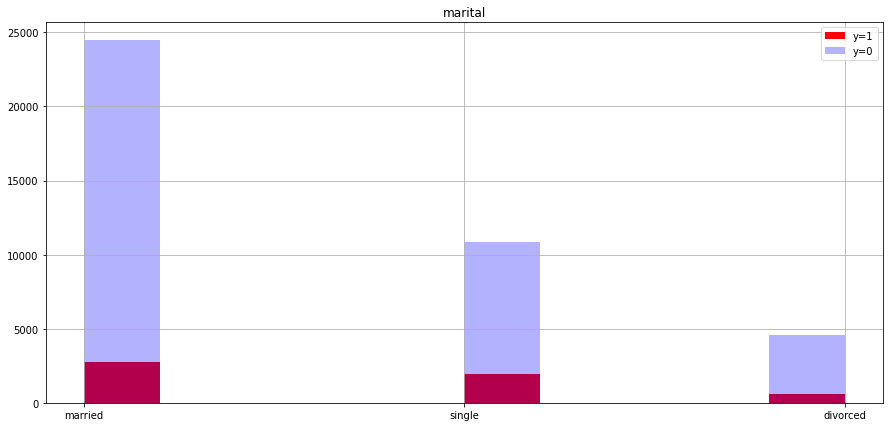

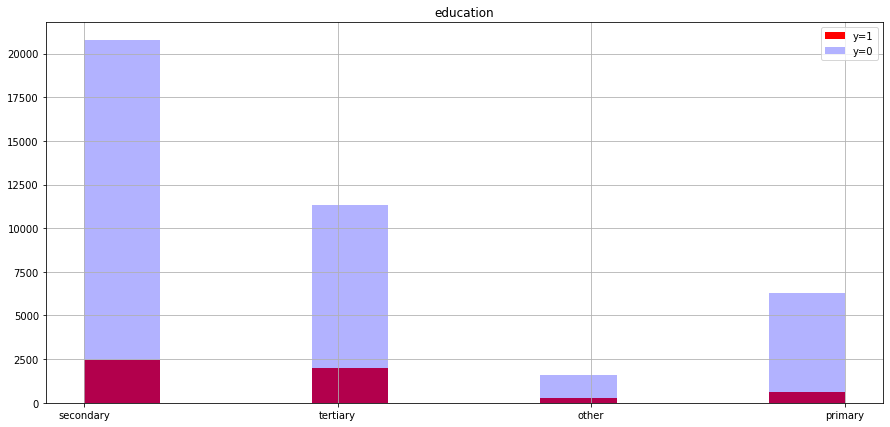

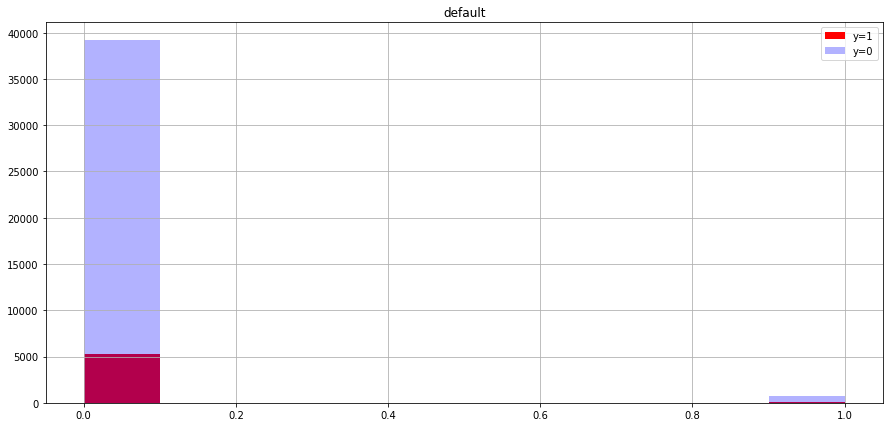

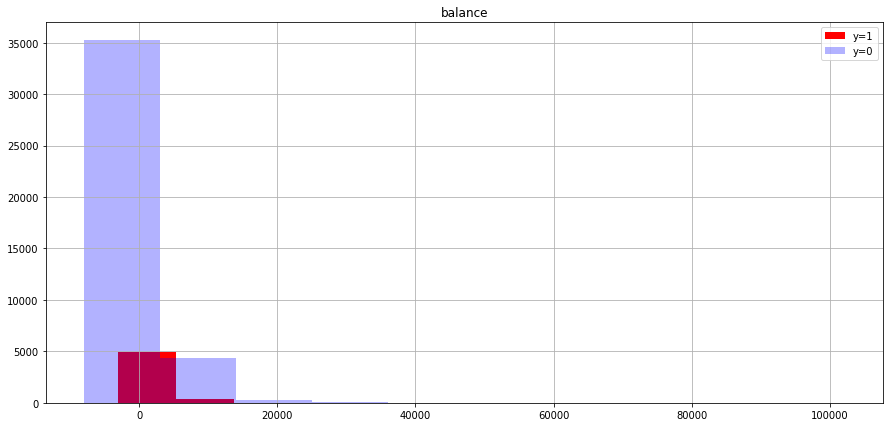

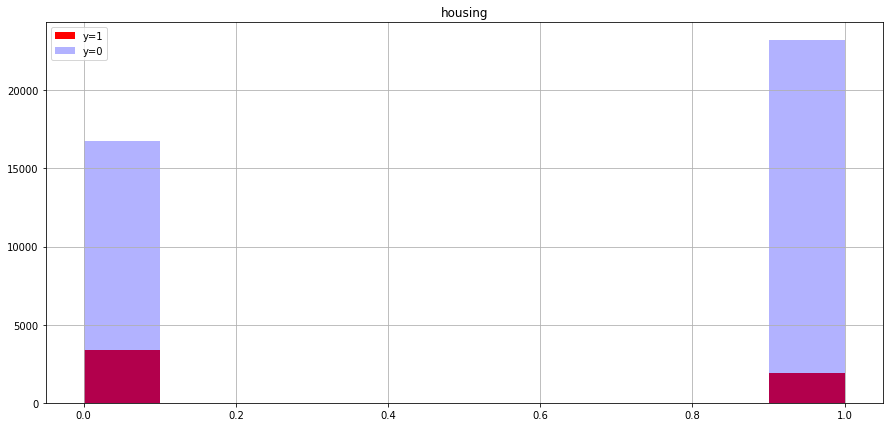

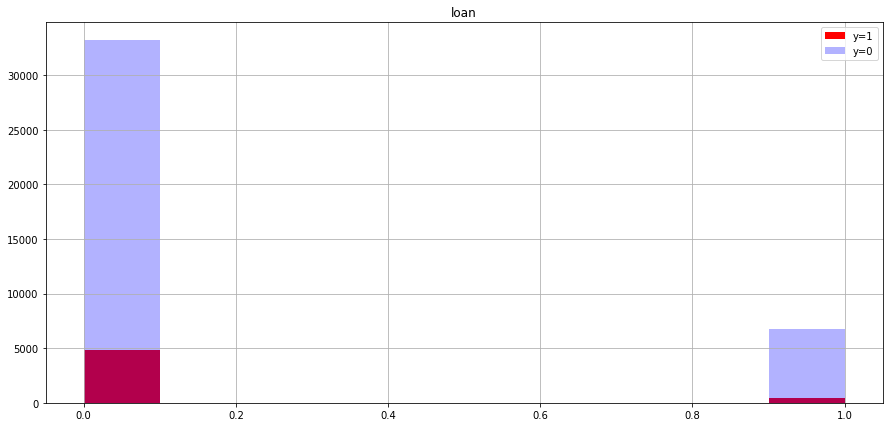

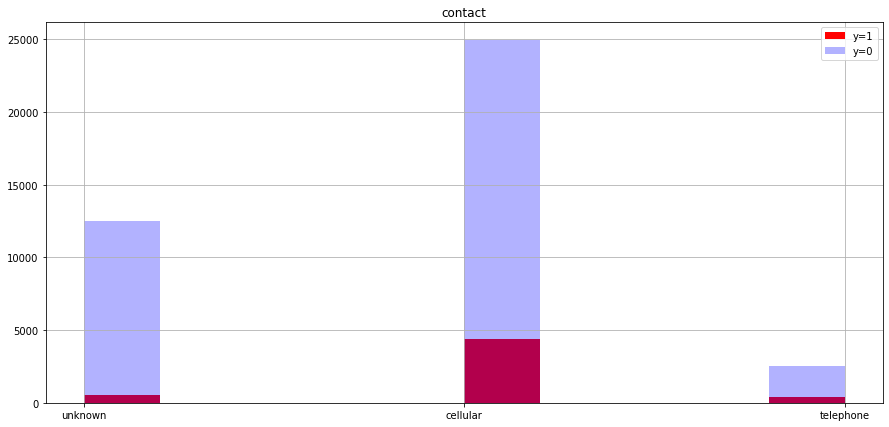

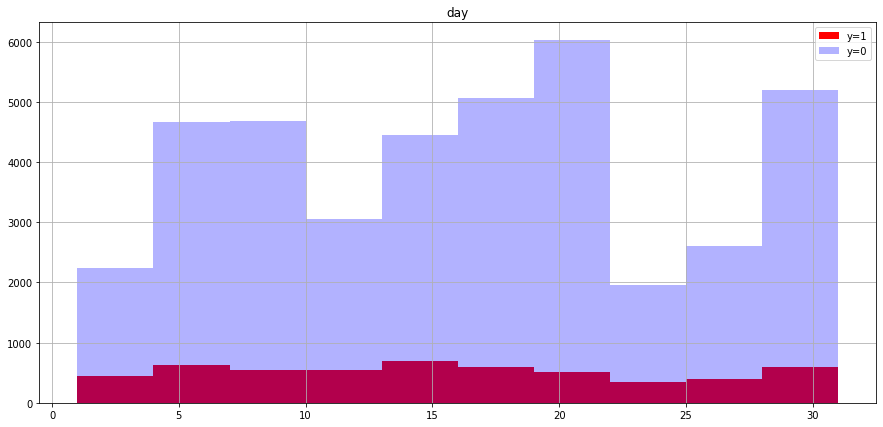

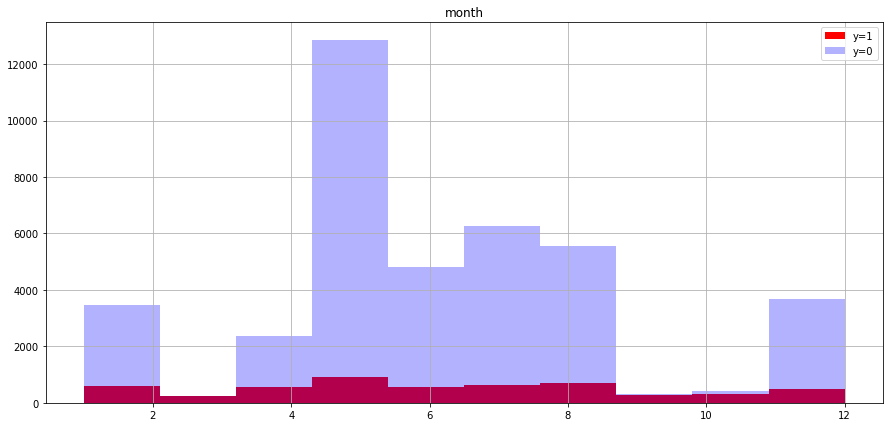

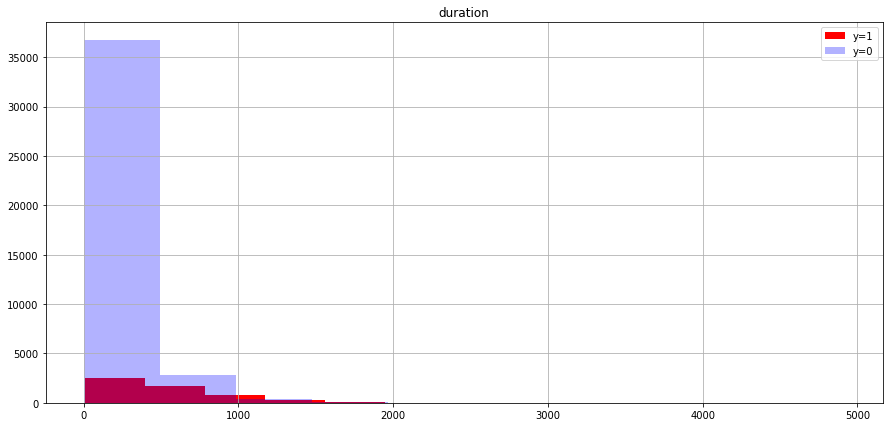

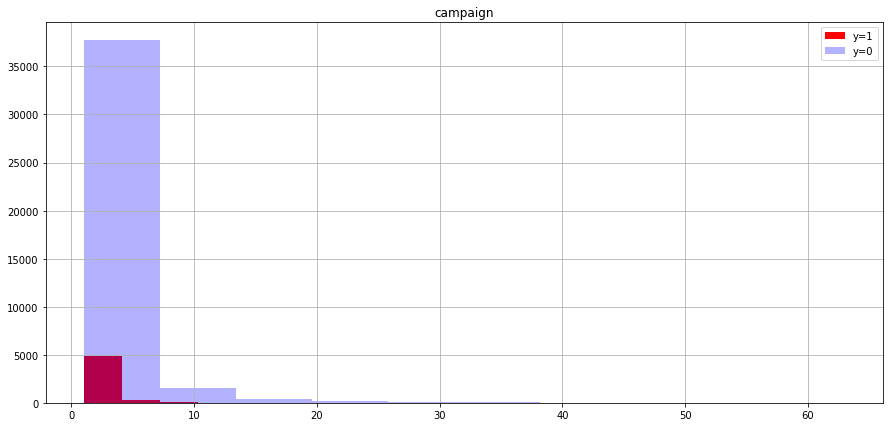

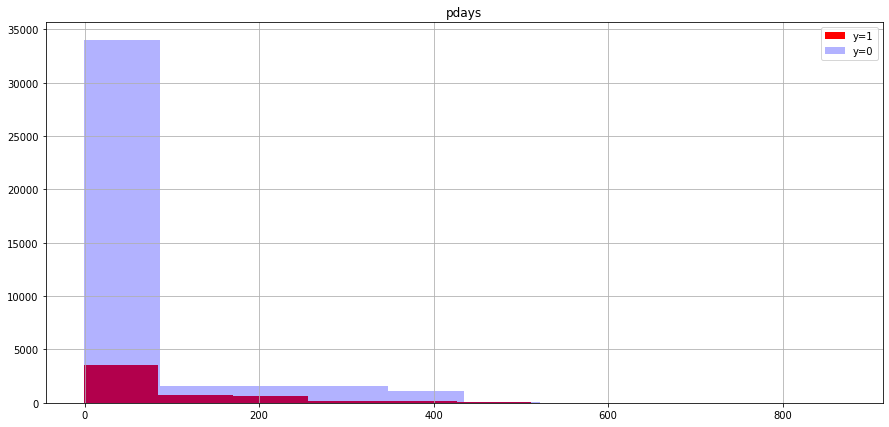

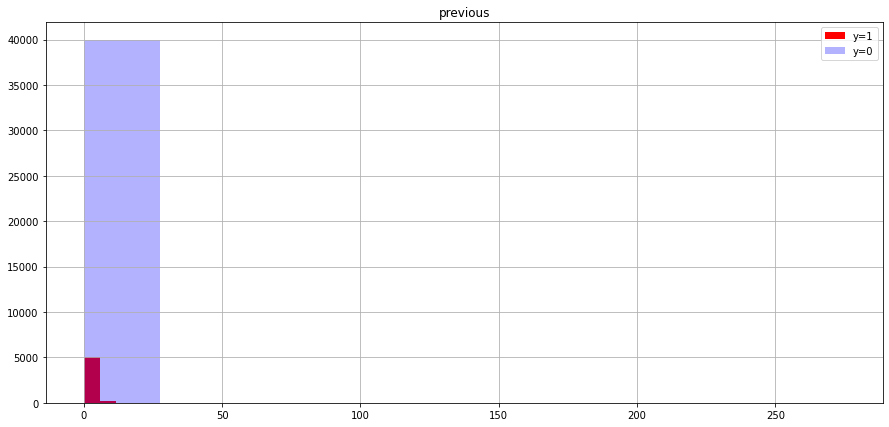

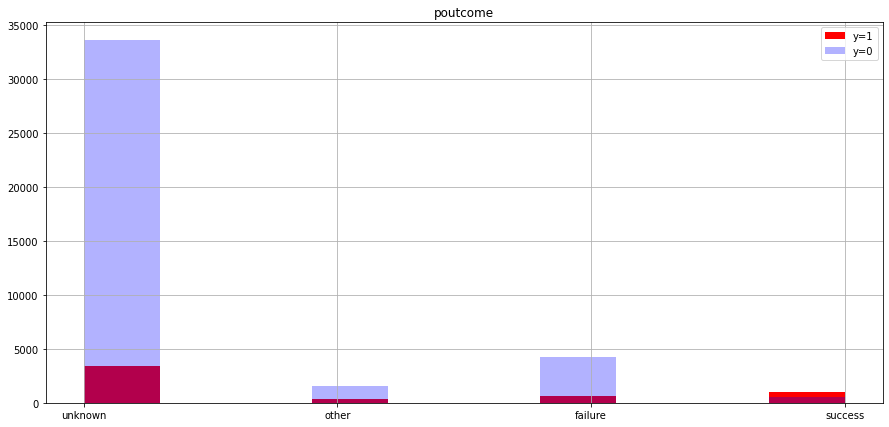

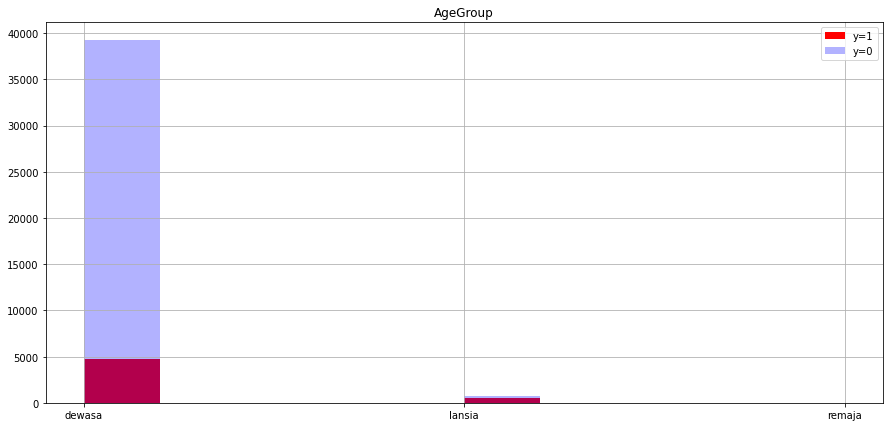

In [25]:
for col in df_train.columns:
    if col != 'y':
        plt.figure(figsize=(15,7))
        plt.title(col)
        df_train[df_train['y']==1][col].hist(alpha=1, color = 'red', label='y=1')
        df_train[df_train['y']==0][col].hist(alpha=0.3, color = 'blue', label='y=0')
        plt.legend()

1. Nasabah dengan profesi management merupakan nasabah yang melakukan deposito terbanyak dan nasabah dengan profesi blue-collar yang paling banyak tidak melakukan deposito.
2. Nasabah dengan balance yang lebih sedikit cenderung melakukan deposito bila dibandingkan dengan mereka yang memiliki balance yang lebih banyak namun mereka juga tertinggi dalam hal tidak melakukan deposito.
3. Jumlah nasabah yang melakukan deposito lebih banyak terjadi pada mereka yang tidak memiliki pinjaman perumahan bila dibandingkan dengan nasabah yang memiliki pinjaman perumahan. Hal tersebut juga terjadi pada kasus pinjaman personal, dimana nasabah yang tidak memiliki pinjaman personal lebih sering melakukan deposito
4. Nasabah yang dihubungi melalui 'cellular' lebih sering melakukan deposito
5. Terdapat tren pada kolom duration, jumlah nasabah yang melakukan deposito semakin menurun seiring dengan meningkatnya durasi komunikasi yang dilakukan oleh bank kepada nasabah.
6. Hal yang sama juga terjadi pada jumlah campaign yang dilakukan oleh bank kepada seorang nasabah. Dari hasil pengamatan didapatkan, bahwa semakin banyak jumlah campaign yang dilakukan oleh bank kepada seorang nasabah maka semakin menurun tingkat deposito
7. Jumlah nasabah yang melakukan deposito semakin menurun jika lama tidak dihubungi lagi oleh pihak bank. Dengan demikian, pihak bank perlu menentukan batas waktu paling lama untuk menghubungi kembali nasabah.
8. Nasabah cenderung melakukan deposito jika campaign sebelumnya berhasil 
9. Tingkat pendidikan tidak mempengaruhi tingkat deposito nasabah

Melihat trend antara balance dan job. Apakah semakin baik profesi seseorang akan mempengaruhi jumlah balance yang dimiliki?

Hasil menunjukkan, nasabah yang telah pensiun menghasilkan rata-rata balance yang paling tinggi

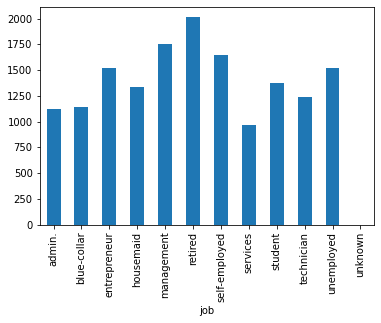

In [26]:
df_train.groupby(['job'])['balance'].mean().plot(kind='bar');plt.show()

Melihat trend antara balance dan status pernikahan. Apakah status pernikahan nasabah mempengaruhi jumlah balance yang dimiliki?

Hasil menunjukkan, nasabah yang telah menikah memiliki rata-rata balance yang paling tinggi lalu disusul oleh mereka yang masih single dan terakhir adalah mereka yang telah berpisah

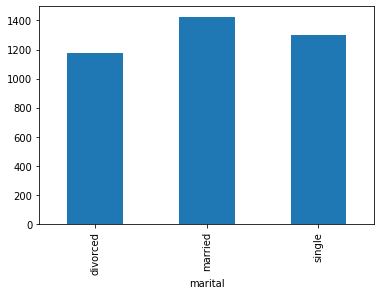

In [27]:
df_train.groupby(['marital'])['balance'].mean().plot(kind='bar');plt.show()

Melihat sasaran campaign berdasarkan balance

Nasabah dengan balance yang kecil cenderung lebih sering dihubungi oleh pihak bank

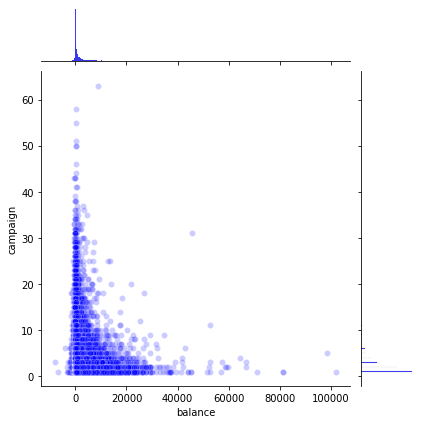

In [28]:
sns.jointplot(x='balance', y='campaign', data=df_train, color = 'blue', alpha=0.2);plt.show()

Campaign yang dilakukan pada saat ini paling sering dilakukan kepada nasabah baru dan mereka yang terakhir kali dihubungi pada 1 bulan yang lalu hingga 1 tahun yang lalu

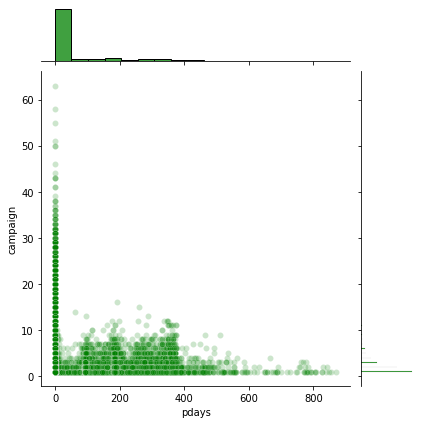

In [29]:
sns.jointplot(x='pdays', y='campaign', data=df_train, color = 'green', alpha=0.2);plt.show()

Kami menemukan bahwa, campaign sebelumnya akan berhasil jika durasi komunikasi yang dilakukan oleh pihak bank kepada nasabah semakin lama

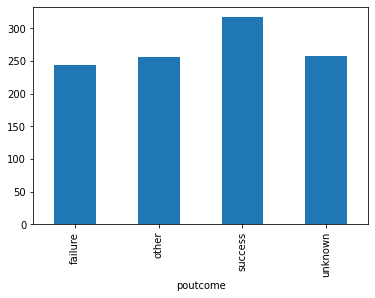

In [30]:
df_train.groupby('poutcome')['duration'].mean().plot(kind='bar');plt.show()

Data Preparation

In [31]:
dfFeature = pd.concat([df_train.iloc[:,df_train.columns!='y'],df_test.iloc[:,df_test.columns!='y']],ignore_index=True)
dfFeature = pd.get_dummies(dfFeature)

scaler = StandardScaler()
scaler.fit(dfFeature)

scalingFeature = scaler.transform(dfFeature)

X_train = scalingFeature[:len(df_train),:]
y_train = df_train.y

X_test = scalingFeature[len(df_train):,:]
y_test = df_test.y

In [32]:
print("Training : ",X_train.shape,y_train.shape)
print("Test : ",X_test.shape,y_test.shape)

Training :  (45211, 39) (45211,)
Test :  (4521, 39) (4521,)


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 666, test_size= 0.20)

In [34]:
print("Training set : ",len(X_train))
print("Validation set : ",len(X_val))
print("Testing set : ",len(X_test))

Training set :  36168
Validation set :  9043
Testing set :  4521


Membuat model

In [35]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[-1],)))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[-1],)))
model.add(keras.layers.Dropout(.1))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(0.001),
    metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10240     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-traina

In [36]:
epochs = 200
batch = 128

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    patience=10, min_lr=0.000001
)


history = model.fit(
    X_train, y_train,
    batch_size=batch,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    validation_data=(X_val,y_val),
    callbacks=[reduce_lr]
)

Epoch 1/200
283/283 [==============================] - 5s 5ms/step - loss: 0.2576 - accuracy: 0.8957 - val_loss: 0.2352 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 2/200
283/283 [==============================] - 1s 5ms/step - loss: 0.2318 - accuracy: 0.9012 - val_loss: 0.2298 - val_accuracy: 0.8962 - lr: 0.0010
Epoch 3/200
283/283 [==============================] - 2s 6ms/step - loss: 0.2275 - accuracy: 0.9030 - val_loss: 0.2307 - val_accuracy: 0.8995 - lr: 0.0010
Epoch 4/200
283/283 [==============================] - 1s 5ms/step - loss: 0.2237 - accuracy: 0.9049 - val_loss: 0.2291 - val_accuracy: 0.8976 - lr: 0.0010
Epoch 5/200
283/283 [==============================] - 1s 4ms/step - loss: 0.2204 - accuracy: 0.9056 - val_loss: 0.2245 - val_accuracy: 0.9001 - lr: 0.0010
Epoch 6/200
283/283 [==============================] - 1s 4ms/step - loss: 0.2184 - accuracy: 0.9048 - val_loss: 0.2261 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 7/200
283/283 [==============================] - 1s 4ms/st

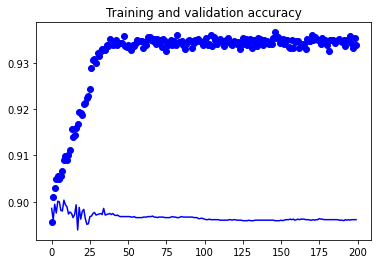

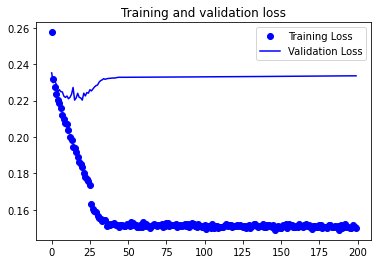

In [38]:
## Melakukan visualisasi data
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label= "Training Loss")
plt.plot(epochs, val_loss, 'b', label= "Validation Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()

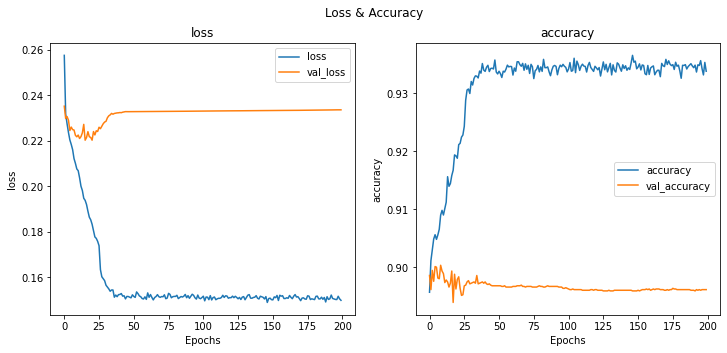

In [46]:
evaluation = pd.DataFrame({
    'loss':history.history['loss'],
    'val_loss':history.history['val_loss'],
    'accuracy':history.history['accuracy'],
    'val_accuracy':history.history['val_accuracy']
    })

columns = evaluation.keys()
N = int(len(columns)/2)

fig, axes = plt.subplots(1, N, sharex=True, figsize=(12,5))
fig.suptitle("Loss & Accuracy")

for i in range(N):
  column_name = evaluation.iloc[:,i*N:N*(i+1)].columns
  axes[i].set_title(f"{column_name[0]}")
  sns.lineplot(data=evaluation,x=range(len(evaluation)),y=evaluation[column_name[0]], ax=axes[i])
  sns.lineplot(data=evaluation,x=range(len(evaluation)),y=evaluation[column_name[1]], ax=axes[i])
  axes[i].legend(column_name)
  axes[i].set_xlabel("Epochs")
  axes[i].grid(False)
plt.show()

In [44]:
model.evaluate(X_test, y_test, verbose=1)

142/142 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9352


[0.15863677859306335, 0.9351913332939148]

In [64]:
"""pred = model.predict(X_test)
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
"""

'pred = model.predict(X_test)\npred[pred>=0.5] = 1\npred[pred<0.5] = 0\n'

In [63]:
### Setelah melakukan training the model, selanjutnya kami mencoba untuk memprediksi ke X_test (data baru)

## melakukan konversi probabilitas menjadi 0 or 1 untuk memprediksikan data kolom y
predictions = (model.predict(X_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(50):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

[-0.13506616793302537, 0.1378358248393571, -1.1207746136937426, -0.4357133934224907, 0.38285704009209126, 1.6020087516141646, -0.6971746364879777, -0.5700303072294062, -0.41106787758234276, -0.2558489940311594, -0.35121772243163724, -0.54761040264787, -0.1804312489427767, -0.16396390672664704, -0.5359041810165099, -0.22325012830562532, -0.18921628737349883, -0.31185784785892895, -0.13131314720629195, -0.44112421099676163, 5.875615469281253, 0.0, -0.3610398822526943, 0.8106329135737856, -0.6255082418499117, 2.367571008945958, -1.0261604572462595, -0.6462456783691549, -0.20703124381791385, 0.7385011321522209, -0.26254653383505505, -0.6366593609270158, -0.34868392358102396, -0.20666126714374117, -0.18466538882663303, 0.47222688338561514, 0.16805648040528232, -0.1648025541661214, -0.03203980937953267] => 0 (expected 0)
[-0.13506616793302537, 1.1248234400834605, 0.8922400523547679, 2.2950866672816437, -0.5791906356181554, -0.4767220382058996, -0.1501128877926896, -0.5700303072294062, 2.9846

In [47]:
tf.keras.backend.clear_session()
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred.squeeze())

conf_matrix


array([[3899,  101],
       [ 192,  329]])

Perbandingan dengan metode lain

Logistic Regression

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
log_Regression=LogisticRegression(max_iter=3000)
log_Regression.fit(X_train,y_train)

y_pred = log_Regression.predict(X_test)

accuracy = accuracy_score(y_pred = y_pred, y_true = y_test)
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

Accuracy of the model Logistic Regression is 90.13%


Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfcpredictions = rfc.predict(X_test)

accuracy = accuracy_score(y_pred = rfcpredictions, y_true = y_test)
print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 97.77%


SVM

In [50]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svcpredictions = svc.predict(X_test)
accuracy = accuracy_score(y_pred = svcpredictions, y_true = y_test)
print(f'Accuracy of the SVM model is {accuracy*100:.2f}%')

Accuracy of the SVM model is 90.71%


Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtcprediction = dtc.predict(X_test)

accuracy = accuracy_score(y_pred = dtcprediction, y_true = y_test)
print(f'Accuracy of the Decision Tree Classifier model is {accuracy*100:.2f}%')

Accuracy of the Decision Tree Classifier model is 97.10%
